In [1]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

In [2]:
import ROOT

Welcome to JupyROOT 6.26/10


## Problem 1

## Triangle Problem

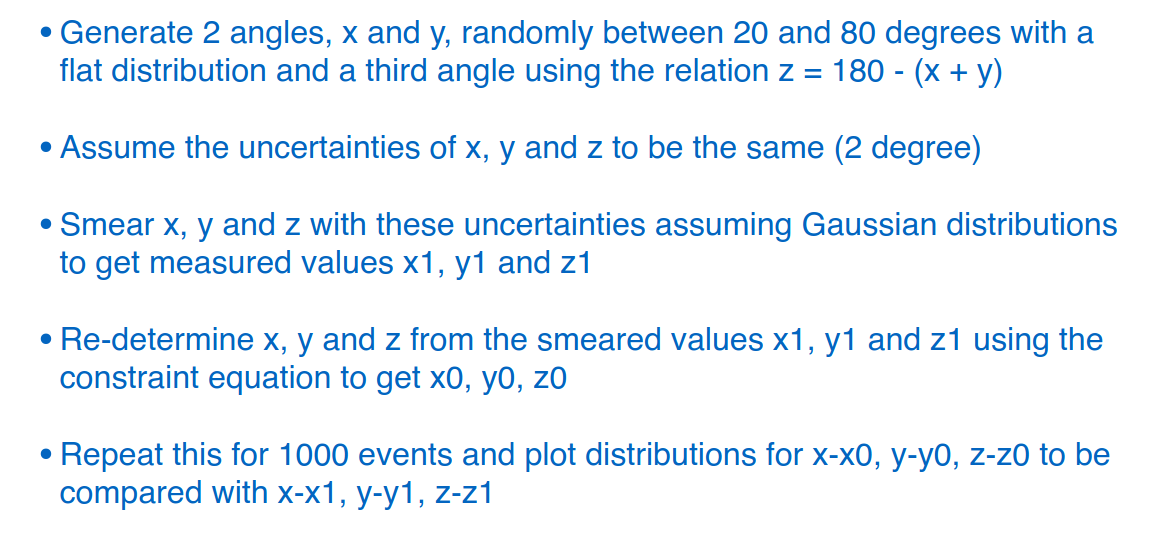

In [19]:
N=1000
sx,sy,sz=2.0,2.0,2.0

x = np.random.uniform(20.0,80.0,N)
y = np.random.uniform(20.0,80.0,N)
z =  180.0 - x -y

x1 = x + np.random.normal(loc=0.0,scale=sx,size=N)
y1 = y + np.random.normal(loc=0.0,scale=sy,size=N)
z1 = z + np.random.normal(loc=0.0,scale=sz,size=N)

In [20]:
x2 = x1 +  sx**2 * (180.0 - x1 - y1 - z1  ) / ( sx*sx + sy*sy +sz*sz)
y2 = y1 +  sy**2 * (180.0 - x1 - y1 - z1  ) / ( sx*sx + sy*sy +sz*sz)
z2 = z1 +  sx**2 * (180.0 - x1 - y1 - z1  ) / ( sx*sx + sy*sy +sz*sz)

#### One Observation

In [26]:
idx=1
print("Original  : ", x[idx], y[idx], z[idx], " |  sum : ",x[idx] + y[idx]+z[idx] )
print("Measured  : ",x1[idx],y1[idx],z1[idx], " |  sum : ",x1[idx] + y1[idx]+z1[idx] )
print("Corrected : ",x2[idx],y2[idx],z2[idx], " |  sum : ",x2[idx] + y2[idx]+z2[idx] )

Original  :  63.04521917468261 49.23670875967328 67.71807206564411  |  sum :  180.0
Measured  :  65.15241063024095 50.424500708093525 68.76253567128994  |  sum :  184.3394470096244
Corrected :  63.70592829369948 48.978018371552054 67.31605333474847  |  sum :  180.0


#### Stats

In [41]:
print("Measured  : Mean : ", np.average(x1 - x), np.average(y1 -y), np.average(z1 -z))
print("Measured  : RMS  : ", np.std(x1 - x), np.std(y1 -y), np.std(z1 -z) )

print("Corrected  : Mean : ", np.average(x2 - x), np.average(y2 -y), np.average(z2 -z))
print("Corrected  : RMS  : ", np.std(x2 - x), np.std(y2 -y), np.std(z2 -z) )

Measured  : Mean :  -0.054317771486692694 -0.10129538877642226 -0.057176967900503015
Measured  : RMS  :  1.9668235418366053 2.005499591391826 1.9273771159324962
Corrected  : Mean :  0.016612271234513188 -0.030365346055216354 0.01375307482070308
Corrected  : RMS  :  1.5840570360823447 1.619366111208724 1.5925345825942414


#### Plots

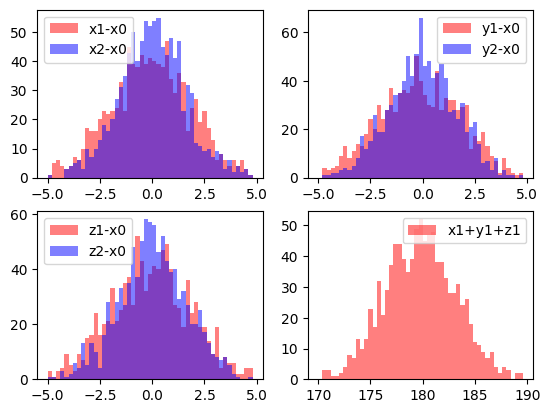

In [33]:
f,ax=plt.subplots(2,2)
ax=np.ndarray.flatten(ax)
_=ax[0].hist(x1-x,bins=np.arange(-5,5,0.2),alpha=0.5,color='r',label='x1-x0')
_=ax[0].hist(x2-x,bins=np.arange(-5,5,0.2),alpha=0.5,color='b',label='x2-x0')
ax[0].legend()

_=ax[1].hist(y1-y,bins=np.arange(-5,5,0.2),alpha=0.5,color='r',label='y1-x0')
_=ax[1].hist(y2-y,bins=np.arange(-5,5,0.2),alpha=0.5,color='b',label='y2-x0')
ax[1].legend()

_=ax[2].hist(z1-z,bins=np.arange(-5,5,0.2),alpha=0.5,color='r',label='z1-x0')
_=ax[2].hist(z2-z,bins=np.arange(-5,5,0.2),alpha=0.5,color='b',label='z2-x0')
ax[2].legend()


_=ax[3].hist(x1+y1+z1,bins=np.arange(170,190,0.4),alpha=0.5,color='r',label='x1+y1+z1')
# _=ax[3].hist(x2+y2+z2,bins=np.arange(170,190,0.4),alpha=0.5,color='b',label='z2-x0')
ax[3].legend()

## Problem 2

 a | a
- | - 
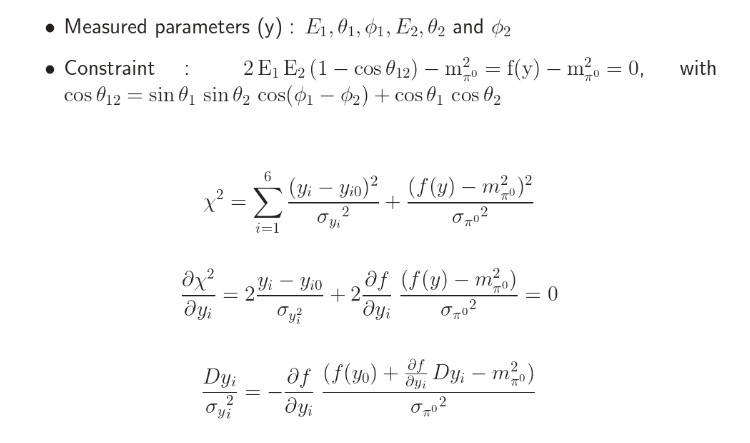 | 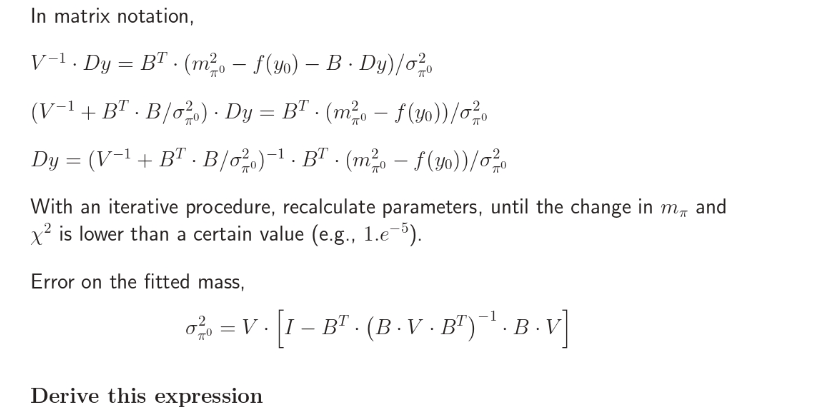
--
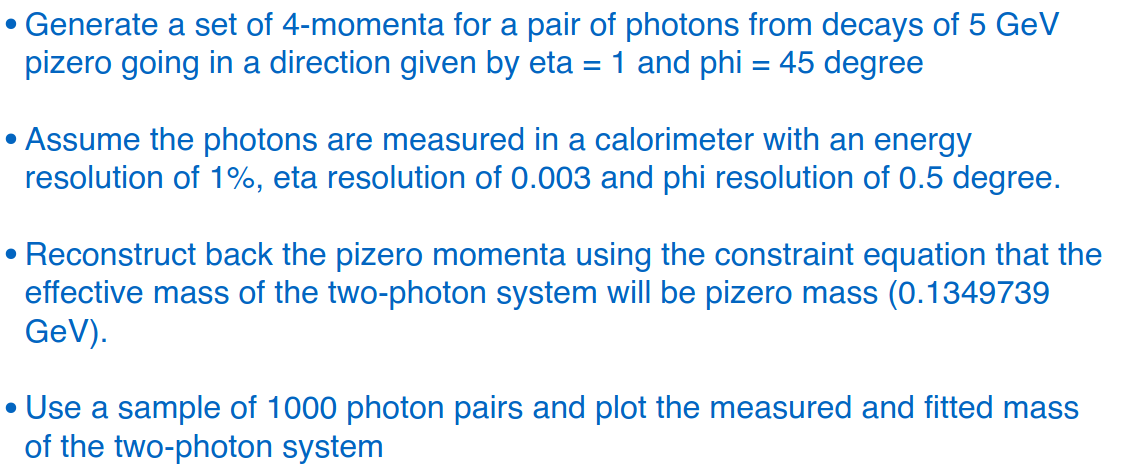


In [3]:
PI0_MASS= 0.1349739

## Data Generation

In [4]:
p4_pi0 = ROOT.TLorentzVector()

In [94]:
e_pi0 = 5.0
theta_pi0 = np.pi/3
phi_pi0 = np.pi/4
p_pi0 = np.sqrt( e_pi0*e_pi0 - PI0_MASS**2)
p4_pi0.SetPxPyPzE( 
    p_pi0*np.sin(theta_pi0)*np.cos(phi_pi0), 
    p_pi0*np.sin(theta_pi0)*np.sin(phi_pi0),
    p_pi0*np.cos(theta_pi0) ,
    e_pi0
)
p4_pi0.E()
print(theta_pi0/np.pi)

0.3333333333333333


In [96]:
pi0_boost = p4_pi0.BoostVector()

In [97]:
p4_g1 = ROOT.TLorentzVector()
p4_g2 = ROOT.TLorentzVector()

In [98]:
g_pCm = PI0_MASS/2
N=1000
theta_cm = np.arccos(2*np.random.uniform(0.0,1.0,N) - 1)
phi_cm   = np.random.uniform(0.0,2*np.pi,N)

In [106]:
true_data={
    'g1' : { 'e' :[] , 'theta' :[] , 'phi' :[] },
    'g2' : { 'e' :[] , 'theta' :[] , 'phi' :[] }
}

for theta,phi in zip(theta_cm,phi_cm):
    flip =[-1.0,1.0][np.random.randint(2)]
    p4_g1.SetPxPyPzE(
        flip*g_pCm*np.sin(theta)*np.cos(phi) , 
        flip*g_pCm*np.sin(theta)*np.sin(phi) , 
        flip*g_pCm*np.cos(theta) , 
        g_pCm
    )

    p4_g2.SetPxPyPzE(
        -1*flip*g_pCm*np.sin(theta)*np.cos(phi) , 
        -1*flip*g_pCm*np.sin(theta)*np.sin(phi) , 
        -1*flip*g_pCm*np.cos(theta) , 
        g_pCm
    )
    
    p4_g1.Boost(pi0_boost)
    p4_g2.Boost(pi0_boost)

    true_data['g1']['e'].append(p4_g1.E())
    true_data['g1']['theta'].append(p4_g1.Theta())
    true_data['g1']['phi'].append(p4_g1.Phi())

    true_data['g2']['e'].append(p4_g2.E())
    true_data['g2']['theta'].append(p4_g2.Theta())
    true_data['g2']['phi'].append(p4_g2.Phi())
    
#     break
    

In [126]:
for tag in true_data:
    for ky in true_data[tag]:
        true_data[tag][ky]=np.array(true_data[tag][ky])

In [140]:
NITEM=len(true_data['g1']['e'])

### Smearing

In [127]:
smeared_data={
    'g1' : { 'e' :[] , 'theta' :[] , 'phi' :[] },
    'g2' : { 'e' :[] , 'theta' :[] , 'phi' :[] }
}

In [260]:
e_sigma=0.2
smeared_data['g1']['e']  = true_data['g1']['e'] + true_data['g1']['e']*np.random.normal(loc=0.0,scale=e_sigma,size=N)
smeared_data['g2']['e']  = true_data['g2']['e'] + true_data['g2']['e']*np.random.normal(loc=0.0,scale=e_sigma,size=N)

In [261]:
theta_sigma = 1.0*np.pi/180.0
smeared_data['g1']['theta']  =  true_data['g1']['theta']  + np.random.normal(loc=0.0,scale=theta_sigma,size=N)
smeared_data['g2']['theta']  =  true_data['g2']['theta']  + np.random.normal(loc=0.0,scale=theta_sigma,size=N)

In [262]:
phi_sigma = 1.0*np.pi/180.0
smeared_data['g1']['phi']  = true_data['g1']['phi'] + np.random.normal(loc=0.0,scale=phi_sigma,size=N)
smeared_data['g2']['phi']  = true_data['g2']['phi'] + np.random.normal(loc=0.0,scale=phi_sigma,size=N)

In [263]:
# TRUE, SMEARED
if False:
    f,ax=plt.subplots(1,2)
    _=ax[0].hist(true_data['g1']['e'],alpha=0.2,label='true')
    _=ax[0].hist(smeared_data['g1']['e'],alpha=0.2,label='smeared')
    _=ax[1].hist(true_data['g2']['e'],alpha=0.2)
    _=ax[1].hist(smeared_data['g2']['e'],alpha=0.2)
    ax[0].legend()
    f,ax=plt.subplots(1,2)
    _=ax[0].hist(true_data['g1']['theta'],alpha=0.3)
    _=ax[0].hist(smeared_data['g1']['theta'],alpha=0.3)
    _=ax[1].hist(true_data['g2']['theta'],alpha=0.3)
    _=ax[1].hist(smeared_data['g1']['theta'],alpha=0.3)

    f,ax=plt.subplots(1,2)
    _=ax[0].hist(true_data['g1']['phi'],alpha=0.3)
    _=ax[0].hist(smeared_data['g1']['phi'],alpha=0.3)
    _=ax[1].hist(true_data['g2']['phi'],alpha=0.3)
    _=ax[1].hist(smeared_data['g1']['phi'],alpha=0.3)

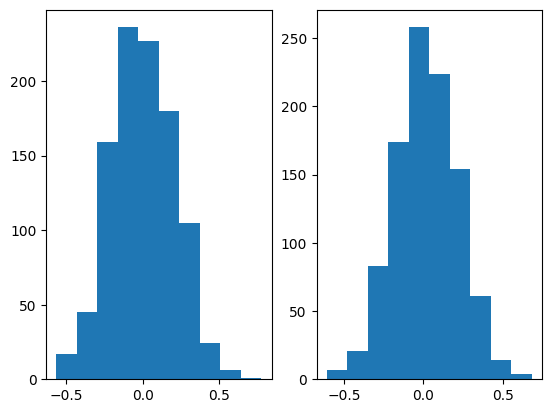

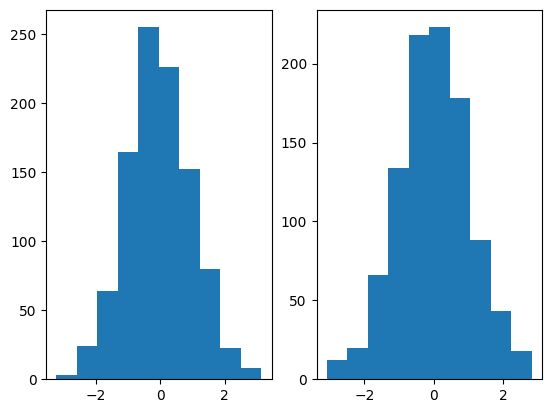

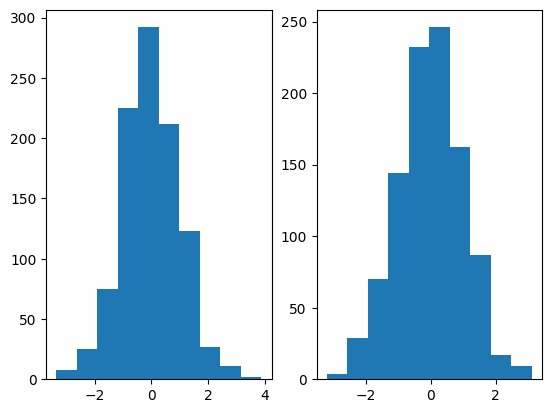

In [264]:
# TRUE - SMEARED
if True:
    f,ax=plt.subplots(1,2)
    _=ax[0].hist((smeared_data['g1']['e']-true_data['g1']['e'])/true_data['g1']['e'])
    _=ax[1].hist((smeared_data['g2']['e']-true_data['g2']['e'])/true_data['g2']['e'])

    f,ax=plt.subplots(1,2)
    _=ax[0].hist((smeared_data['g1']['theta']-true_data['g1']['theta'])*180.0/np.pi)
    _=ax[1].hist((smeared_data['g2']['theta']-true_data['g2']['theta'])*180.0/np.pi)
    
    f,ax=plt.subplots(1,2)
    _=ax[0].hist((smeared_data['g1']['phi']-true_data['g1']['phi'])*180.0/np.pi)
    _=ax[1].hist((smeared_data['g2']['phi']-true_data['g2']['phi'])*180.0/np.pi)

## Reconstructing Pi0 from Smeared Objects

In [265]:
p4_g1_obs = ROOT.TLorentzVector()
p4_g2_obs = ROOT.TLorentzVector()

In [266]:
g1_ctheta =  np.cos(smeared_data['g1']['theta'])
g1_cphi =  np.cos(smeared_data['g1']['phi'])
g1_stheta =  np.sin(smeared_data['g1']['theta'])
g1_sphi =  np.sin(smeared_data['g1']['phi'])

g2_ctheta =  np.cos(smeared_data['g2']['theta'])
g2_cphi =  np.cos(smeared_data['g2']['phi'])
g2_stheta =  np.sin(smeared_data['g2']['theta'])
g2_sphi =  np.sin(smeared_data['g2']['phi'])

In [267]:
reco_pi0={'mass':[],'theta':[],'phi':[],'pt':[],'p':[]}
for i in range(NITEM):
    e1=smeared_data['g1']['e'][i]
    e2=smeared_data['g2']['e'][i]
    p4_g1_obs.SetPxPyPzE(e1*g1_stheta[i]*g1_sphi[i] ,  
                         e1*g1_stheta[i]*g1_cphi[i]  , 
                         e1*g1_ctheta[i],
                         e1)


    p4_g2_obs.SetPxPyPzE(e2*g2_stheta[i]*g2_sphi[i] ,  
                         e2*g2_stheta[i]*g2_cphi[i]  , 
                         e2*g2_ctheta[i],
                         e2)
    p4_pi0_reco = p4_g1_obs + p4_g2_obs
    reco_pi0['mass'].append(p4_pi0_reco.M())
    reco_pi0['theta'].append(p4_pi0_reco.Theta())
    reco_pi0['phi'].append(p4_pi0_reco.Phi())
    reco_pi0['pt'].append(p4_pi0_reco.Pt())
    reco_pi0['p'].append(p4_pi0_reco.P())

for ky in reco_pi0:
    reco_pi0[ky] = np.array(reco_pi0[ky])

### Plotting Pi0

Text(0.5, 0, 'P')

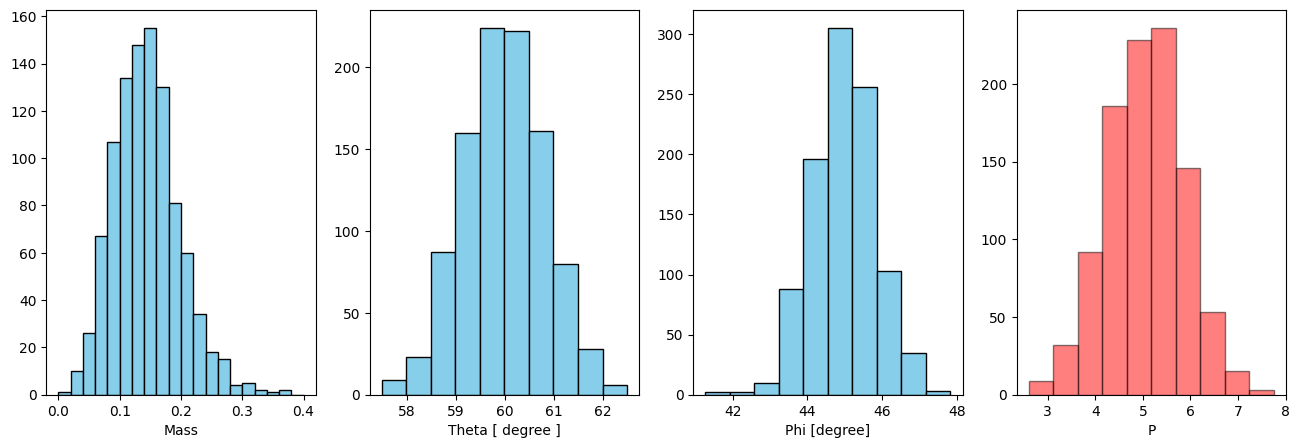

In [268]:
f,ax=plt.subplots(1,4,figsize=(16,5))
_=ax[0].hist(reco_pi0['mass'],color='skyblue',edgecolor='k',bins=np.arange(0.0,0.420,0.02))
_=ax[1].hist(reco_pi0['theta']*180/np.pi,color='skyblue',edgecolor='k')
_=ax[2].hist(reco_pi0['phi']*180/np.pi,color='skyblue',edgecolor='k')
_=ax[3].hist(reco_pi0['p'],color='red',edgecolor='k',alpha=0.5)
ax[0].set_xlabel("Mass")
ax[1].set_xlabel("Theta [ degree ]")
ax[2].set_xlabel("Phi [degree]")
ax[3].set_xlabel("P")


## Constrained Fitting

In [269]:
import numpy.linalg as npl
from numpy import sin,cos

In [270]:
sigma_mPI02 = 0.02**2
mPI02 = PI0_MASS**2

##### Define B : derivative of contraint funtions

In [271]:
def setB(B,x):
    e1,t1,p1,e2,t2,p2=x
    st1,ct1,sp1,cp1=sin(t1),cos(t1),sin(p1),cos(p1)
    st2,ct2,sp2,cp2=sin(t2),cos(t2),sin(p2),cos(p2)
    cp1p2,sp1p2=cos(p1-p2),sin(p1-p2)
    c12=st1*st2*cp1p2+ct1*ct2
    B[0] =  2*e2*(1-c12)
    B[1] = -2*e1*e2*(  ct1*st2*cp1p2 -st1*ct2 )
    B[2] =  2*e1*e2*(  st1*st2*sp1p2  )
    B[3] =  2*e1*(1-c12)
    B[4] = -2*e1*e2*(  st1*ct2*cp1p2 -ct1*st2 )
    B[5] = -1*B[2]

##### Define the constraint funtion [ here to follow the convention in problem -mpi0**2 is not there ] 

In [272]:
def getF(x):
    e1,t1,p1,e2,t2,p2=x
    st1,ct1=sin(t1),cos(t1)
    st2,ct2=sin(t2),cos(t2)
    cp1p2=cos(p1-p2)
    c12=st1*st2*cp1p2+ct1*ct2
    return 2*e1*e2*(1.0-c12) #-PI0_MASS**2

## Iteration

#### Breaking Conditions

In [273]:
CHI2_TOL=1e-5
M_TOL = 1e-6
NITER_MAX=1000

##### Iterative Procedure

In [274]:
corr_mass=[]

fit_sucess=[]

corrected_data={ 
    'g1' : { 'e' :[] , 'theta' :[] , 'phi' :[] },
    'g2' : { 'e' :[] , 'theta' :[] , 'phi' :[] }
}

for idx in range(NITEM):
    x=np.array([
    smeared_data['g1']['e'][idx],smeared_data['g1']['theta'][idx],smeared_data['g1']['phi'][idx],
    smeared_data['g2']['e'][idx],smeared_data['g2']['theta'][idx],smeared_data['g2']['phi'][idx]
    ])
    
    V=np.zeros((6,6))
    V[0][0] = (smeared_data['g1']['e'][idx]*e_sigma)**2
    V[1][1] = theta_sigma**2
    V[2][2] = phi_sigma**2
    V[3][3] = (smeared_data['g2']['e'][idx]*e_sigma)**2
    V[4][4] = theta_sigma**2
    V[5][5] = phi_sigma**2
    
    V=np.matrix(V)
    Vinv=npl.inv(V)
    sigma2_InvDiag = np.array([Vinv[i,i] for i in range(Vinv.shape[1])])
    
    chi2_prev=1e2
    m_prev=1e8
    sucess=False
    x_last=x
    print("Processing ",idx)
    for j in range(NITER_MAX):
        fi=getF(x)
        chi2val = np.sum((x_last-x)*(x_last-x)*sigma2_InvDiag + (mPI02-fi)/sigma_mPI02)
        m = np.sqrt(fi)
#         print(j," m0 : ",f"{m:.4f}",f" ch2 : {chi2val:.4f}" ,", | Vals :",[f"{tt:.4f}" for tt in x] )
        if np.abs(chi2val - chi2_prev ) < CHI2_TOL:
            print(f"  > [ {idx} ]CHI2 BREAK @{CHI2_TOL} " )
            sucess=True
            break
        if np.abs(m - m_prev ) < M_TOL*0 + 1e-10:
            print(f"  > [ {idx} ]MASS BREAK @{M_TOL} " )
            sucess=True
#             break
        setB(B,x)
    #     print(B)
        BoB = np.outer(B,B)
        M1 =  Vinv + BoB/sigma_mPI02
        M1_inv = npl.inv(M1)
    #     dX = np.matmul(M1_inv,B)*(mPI02-fi)/sigma_mPI02
        dX = np.matmul(M1_inv,B)*(mPI02-fi)/sigma_mPI02

        x_last = x
        m_prev = m 
        chi2_prev = chi2val 
        x = np.array([x[j] + dX[0,j] for j in range(len(x))])
#         if j >100:
#             break
    corr_mass.append(m)
    corrected_data['g1']['e'].append(x[0])
    corrected_data['g1']['theta'].append(x[1])
    corrected_data['g1']['phi'].append(x[2])
    corrected_data['g2']['e'].append(x[3])
    corrected_data['g2']['theta'].append(x[4])
    corrected_data['g2']['phi'].append(x[5])
    fit_sucess.append(sucess)
#     break

Processing  0
  > [ 0 ]CHI2 BREAK @1e-05 
Processing  1
  > [ 1 ]CHI2 BREAK @1e-05 
Processing  2
  > [ 2 ]CHI2 BREAK @1e-05 
Processing  3
  > [ 3 ]CHI2 BREAK @1e-05 
Processing  4
  > [ 4 ]CHI2 BREAK @1e-05 
Processing  5
  > [ 5 ]CHI2 BREAK @1e-05 
Processing  6
  > [ 6 ]CHI2 BREAK @1e-05 
Processing  7
  > [ 7 ]CHI2 BREAK @1e-05 
Processing  8
  > [ 8 ]CHI2 BREAK @1e-05 
Processing  9
  > [ 9 ]CHI2 BREAK @1e-05 
Processing  10
  > [ 10 ]CHI2 BREAK @1e-05 
Processing  11
  > [ 11 ]CHI2 BREAK @1e-05 
Processing  12
  > [ 12 ]CHI2 BREAK @1e-05 
Processing  13
  > [ 13 ]CHI2 BREAK @1e-05 
Processing  14
  > [ 14 ]CHI2 BREAK @1e-05 
Processing  15
  > [ 15 ]CHI2 BREAK @1e-05 
Processing  16
  > [ 16 ]CHI2 BREAK @1e-05 
Processing  17
  > [ 17 ]CHI2 BREAK @1e-05 
Processing  18
  > [ 18 ]CHI2 BREAK @1e-05 
Processing  19
  > [ 19 ]CHI2 BREAK @1e-05 
Processing  20
  > [ 20 ]CHI2 BREAK @1e-05 
Processing  21
  > [ 21 ]CHI2 BREAK @1e-05 
Processing  22
  > [ 22 ]CHI2 BREAK @1e-05 
Processi

### Infering Corrected Objects 

In [277]:
corrected_data['pi0'] ={ 'e' :[] , 'theta' :[] , 'phi' :[] ,'mass' : []  , 'p' : [] }

for i in range(NITEM):
    p=corrected_data['g1']['e'][i]
    t,ph = corrected_data['g1']['theta'][i],corrected_data['g1']['phi'][i]
    p4_g1.SetPxPyPzE(p*sin(t)*cos(ph),p*sin(t)*sin(ph),p*cos(t),p)
    p=corrected_data['g2']['e'][i]
    t,ph = corrected_data['g2']['theta'][i],corrected_data['g2']['phi'][i]
    p4_g2.SetPxPyPzE(p*sin(t)*cos(ph),p*sin(t)*sin(ph),p*cos(t),p)
    
    p4_pi0_corr = p4_g1 + p4_g2
#     print(p4_pi0_corr.M())
    corrected_data['pi0']['p'].append(p4_pi0_corr.P())
    corrected_data['pi0']['mass'].append(p4_pi0_corr.M())
    
    

for tag in corrected_data:
    for ky in corrected_data[tag]:
        corrected_data[tag][ky]=np.array(corrected_data[tag][ky])

#### Closure Test : Mass

PI0 P  = 4.99817787261706

Measured  : Mean :  0.14406767406759446
Measured  : RMS  :  0.05351567685497623

Corrected  : Mean :  0.13497390001007042
Corrected  : RMS  :  8.643584247489256e-09


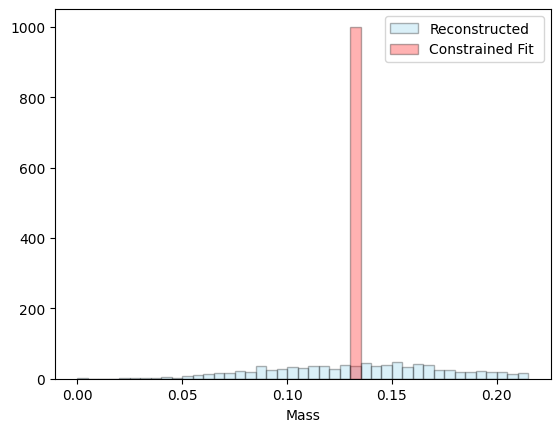

In [278]:
_=plt.hist(reco_pi0['mass'],color='skyblue',edgecolor='k',label='Reconstructed',
           bins=np.arange(0.0,0.220,0.005),alpha=0.3)
_=plt.hist(corrected_data['pi0']['mass'],color='red',edgecolor='k',label='Constrained Fit ',
           bins=np.arange(0.0,0.220,0.005),alpha=0.3)

plt.legend()

plt.xlabel("Mass")
print(f"PI0 P  = { p4_pi0.P() }")
print()
print("Measured  : Mean : ", np.average(reco_pi0['mass']))
print("Measured  : RMS  : ", np.std(reco_pi0['mass']))


print()
print("Corrected  : Mean : ", np.average(corrected_data['pi0']['mass']))
print("Corrected  : RMS  : ", np.std(corrected_data['pi0']['mass']))

In [213]:
# Smeared , Corrected
if False:
    f,ax=plt.subplots(1,3,figsize=(14,6))
    _=ax[0].hist(corrected_data['g1']['phi']*180/np.pi,bins=100,alpha=0.5,label='Smeared')
    _=ax[0].hist(true_data['g1']['phi']*180/np.pi,bins=100,alpha=0.5,label='Corrected')
    ax[0].set_xlabel('Phi')
    ax[0].legend()
    _=ax[1].hist(corrected_data['g1']['theta']*180/np.pi,bins=100,alpha=0.5)
    _=ax[1].hist(true_data['g1']['theta']*180/np.pi,bins=100,alpha=0.5)
    ax[1].set_xlabel('Theta')
    _=ax[2].hist(corrected_data['g1']['e'],bins=30,alpha=0.5)
    _=ax[2].hist(true_data['g1']['e'],bins=30,alpha=0.5)
    ax[2].set_xlabel('E')

### P

PI0 P  = 4.99817787261706

Measured  : Mean :  5.061240945221552
Measured  : RMS  :  0.8049777032322797

Corrected  : Mean :  4.971147388813407
Corrected  : RMS  :  0.7467836144599111


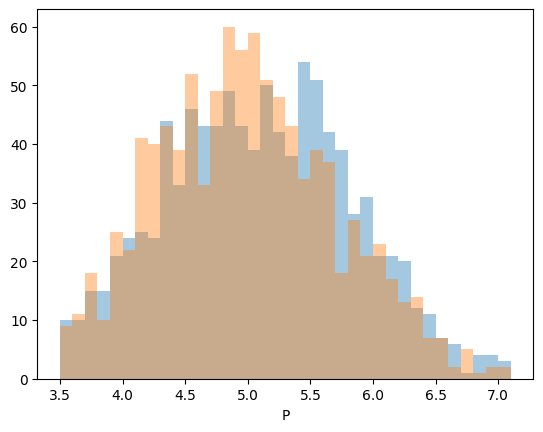

In [280]:
_=plt.hist(reco_pi0['p'],alpha=0.4,label='reco',bins=np.arange(3.5,7.2,0.1))
_=plt.hist(corrected_data['pi0']['p'],alpha=0.4,label='corrected',bins=np.arange(3.5,7.2,0.1))

plt.xlabel("P")
print(f"PI0 P  = { p4_pi0.P() }")
print()
print("Measured  : Mean : ", np.average(reco_pi0['p']))
print("Measured  : RMS  : ", np.std(reco_pi0['p']))


print()
print("Corrected  : Mean : ", np.average(corrected_data['pi0']['p']))
print("Corrected  : RMS  : ", np.std(corrected_data['pi0']['p']))
